## 5 Application: LSTM Stock Price Prediction

In [29]:
#Below are all packages required for the implementation:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
import math
from sklearn.metrics import mean_squared_error
import yfinance as yf
from scipy.stats import linregress
import mplfinance as mpf

## 5.2 An Overview of the Dataset

Getting the data 

The dataset was sourced from the Bloomberg terminal, known for its extensive financial market data crucial for identifying lucrative investment opportunities. Accessing this data was facilitated through the Data Analytics Lab's Bloomberg terminal, offering a streamlined method for downloading market data. The dataset, along with all requisite functions, is saved in a CSV file within the same directory as this document. Market data only from Advanced Micro Devices (AMD) was used. 

In [2]:
import pandas as pd
df = pd.read_csv("AMD 20 YEAR PRICE DATA_1.csv", index_col='Date', parse_dates=["Date"])

print(df.head())
print(df.tail())

             Open   High    Low   Last  Close    Volume   Turnover
Date                                                              
2004-01-04  15.10  15.11  14.77  14.86  14.90   8225700  122954900
2004-01-05  15.05  15.27  15.01  15.20  14.86   9157300  139011700
2004-01-06  15.21  15.82  15.05  15.61  15.20  14592400  226088900
2004-01-07  15.78  15.99  15.49  15.66  15.61  15331000  240806400
2004-01-08  15.95  16.00  15.59  15.93  15.66  12062900  190947700
               Open      High       Low    Last   Close    Volume     Turnover
Date                                                                          
2024-04-05  168.100  172.6900  165.5800  170.42  165.83  66080261  11254820000
2024-04-08  168.200  171.6599  166.8200  169.90  170.42  43997546   7460862000
2024-04-09  170.210  171.6000  167.2900  170.78  169.90  42927985   7271022000
2024-04-10  166.710  169.7752  164.0000  167.14  170.78  59599958   9911220000
2024-04-11  167.545  170.9499  166.5492  170.50  167.14  

Content of dataset:

As shown above, the dataset contains 8 columns:

Date: the trading date, covering AMD’s stock prices from 2004 to 2024.

Open: opening price at which the stock is traded during the regular
trading date

High: the highest price at which the stock is traded during the
regular trading date

Low: the lowest price at which the stock is traded during the
regular trading date

Last: the final price at which a stock is traded during the standard trading session

Close: the last price at which the stock is traded at the end of the regular
trading date

Total Trade Quantity / Volume: total number of shares traded for a particular security during regular trading date 

Turnover: total value of securities traded during a specific period, often calculated by multiplying the average price of the security by the total number of shares traded. It provides a measure of the market activity and liquidity for a security or market as a whole.

Data Visualization

Let us visualize our dataset to understand the stock price trends. We’ll plot the training set (before 2023) and the test set (2023 and beyond) separately.

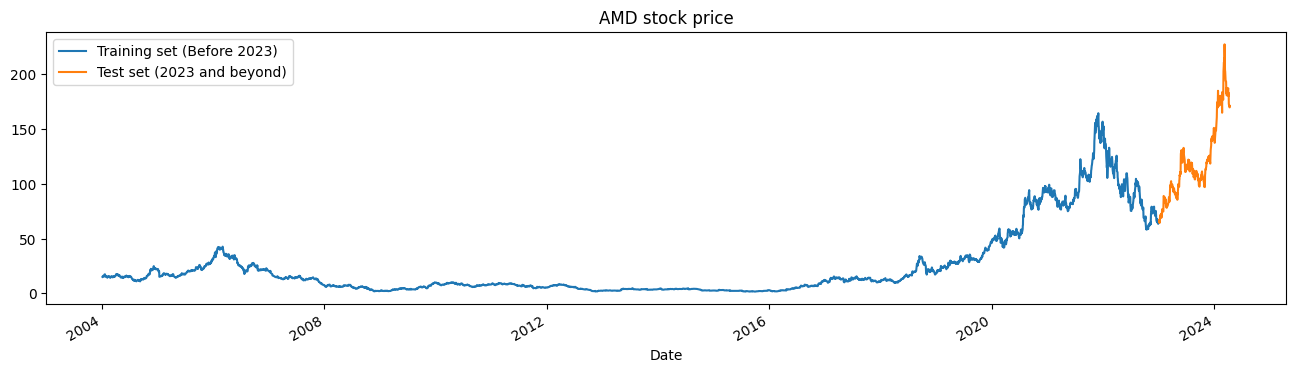

In [3]:
import matplotlib.pyplot as plt
# Plot the training set
df["High"][:'2022'].plot(figsize=(16, 4), legend=True)
# Plot the test set
df["High"]['2023':].plot(figsize=(16, 4), legend=True)
plt.legend(['Training set (Before 2023)', 'Test set (2023 and beyond)'])
plt.title('AMD stock price')
plt.show()

Analysis: The graph indicates a stable trend in Highest prices for AMD from 2004 to 2018. In contrast, the highest prices from 2020 to 2022 are generally on the rise, potentially related to the demand of technology products caused bye COVID-19. The declining trend in the highest prices in 2023 may be associated with the dying down of the virus. The upward trend in 2024 can be associated with the demand for AI Chips.


## 5.3 Preprocessing of the dataset

Data Preprocessing

To ensure we have sufficient data for the time series prediction, we obtained a large dataset containing the price information of AMD, starting from 2004 till now. (~20 year)

Before feeding the data into our LSTM model, we need to preprocess it. We use Min-Max scaling to scale the stock prices to a range between 0 and 1.

In [4]:
from sklearn.preprocessing import MinMaxScaler

# here we are seperating the data 
training_set = df[:'2022'].iloc[:,1:2].values
test_set = df['2023':].iloc[:,1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

Creating the Training Data

We create our training data by creating sequences of stock prices and their corresponding labels. Each sequence will contain the stock prices of the previous 60 days.

In [5]:


X_train = []
y_train = []

for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i - 60:i, 0])
    y_train.append(training_set_scaled[i, 0])
    
    
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## 5.4 Building the LSTM Models

time to build our LSTM model. We’ll create a sequential model with multiple LSTM layers and dropout for regularization.

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))

regressor.add(Dense(units=1))


regressor.compile(optimizer='adam',loss='mean_squared_error')

Training the Model

With our model architecture in place, train it on our prepared training data.

In [7]:
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50

148/148 [==============================] - 35s 148ms/step - loss: 0.0040
Epoch 2/50
148/148 [==============================] - 20s 133ms/step - loss: 0.0018
Epoch 3/50
148/148 [==============================] - 20s 135ms/step - loss: 0.0019
Epoch 4/50
148/148 [==============================] - 19s 125ms/step - loss: 0.0014
Epoch 5/50
148/148 [==============================] - 17s 112ms/step - loss: 0.0016
Epoch 6/50
148/148 [==============================] - 15s 104ms/step - loss: 0.0013
Epoch 7/50
148/148 [==============================] - 20s 134ms/step - loss: 0.0011
Epoch 8/50
148/148 [==============================] - 20s 135ms/step - loss: 0.0012
Epoch 9/50
148/148 [==============================] - 18s 120ms/step - loss: 0.0012
Epoch 10/50
148/148 [==============================] - 21s 139ms/step - loss: 0.0011
Epoch 11/50
148/148 [==============================] - 20s 135ms/step - loss: 0.0010
Epoch 12/50
148/148 [==============================] - 21s 140ms/step - l

Now, we can make predictions on our test data.

In [8]:
# pre-processing the data 
dataset_total = pd.concat((df["High"][:'2022'],df["High"]['2023':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

# making the test data
X_test = []
for i in range(60,len(inputs)):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

10/10 [==============================] - 5s 55ms/step


## 5.5 Visualisation of the Predicted Results

visualize our model’s predictions against the actual test data.

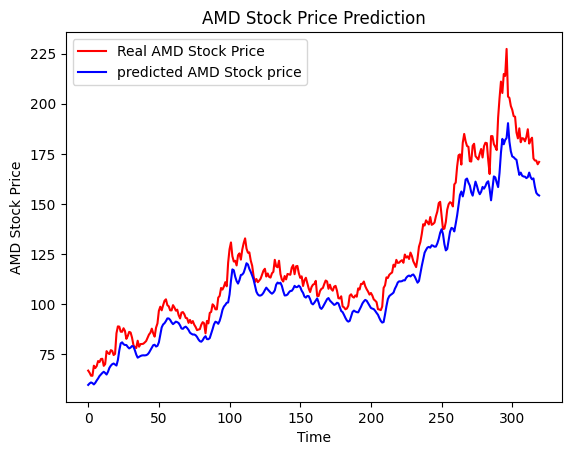

In [9]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real AMD Stock Price")
    plt.plot(prediction, color="blue",label="predicted AMD Stock price")
    plt.title("AMD Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("AMD Stock Price")
    plt.legend()
    plt.show()
# now we'll use this function to visualize our test and predicted data

plot_prediction(test_set,predicted_stock_price)

## 5.5 Evaluation

Evaluate our model’s performance using the Root Mean Squared Error (RMSE).

In [10]:

import math
from sklearn.metrics import mean_squared_error

def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
  
return_rmse(test_set, predicted_stock_price)

The root mean squared error is 12.703288787014554.


The RMSE of 7 to 13 provides context for evaluating the accuracy of the LSTM stock prediction model. While there isn't a universal benchmark for what constitutes a "good" RMSE, lower values generally indicate better predictive performance, suggesting that the model's predictions closely align with the actual stock values. In this case, an RMSE of 7.83 suggests a moderate level of prediction accuracy.

In [11]:
import mplfinance as mpf

import yfinance as yf

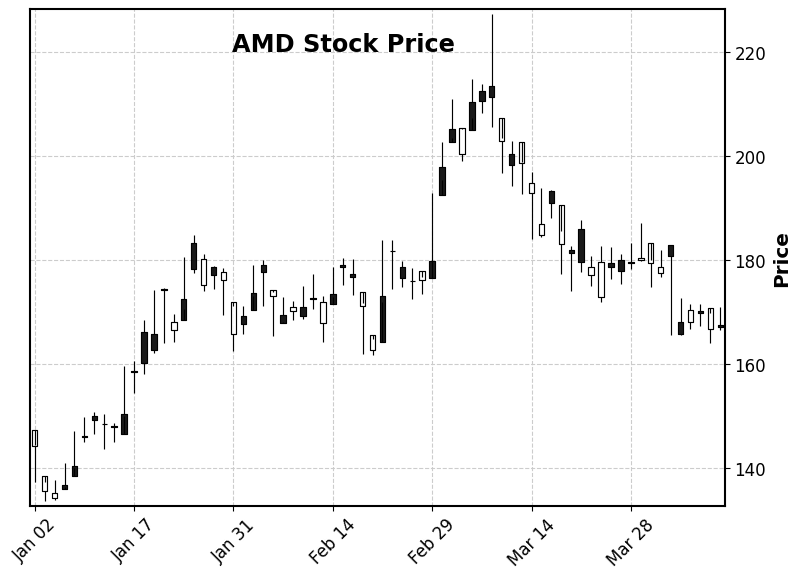

In [12]:
# candlestick

mpf.plot(df['2024-01-01':], type='candle', style = 'classic', title = 'AMD Stock Price',tight_layout = True )

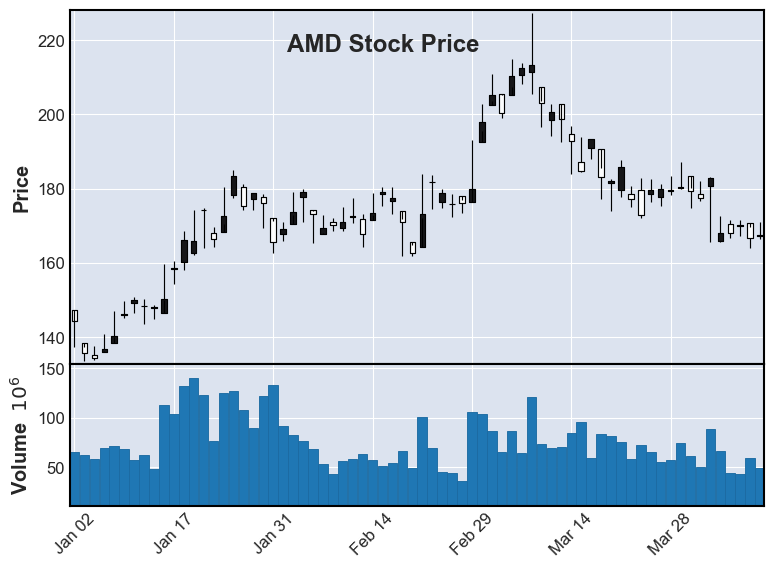

In [13]:
#Adding Volume Bars and Moving Averages

mpf.plot(df['2024-01-01':], type='candle', title = 'AMD Stock Price',tight_layout = True, volume = True)

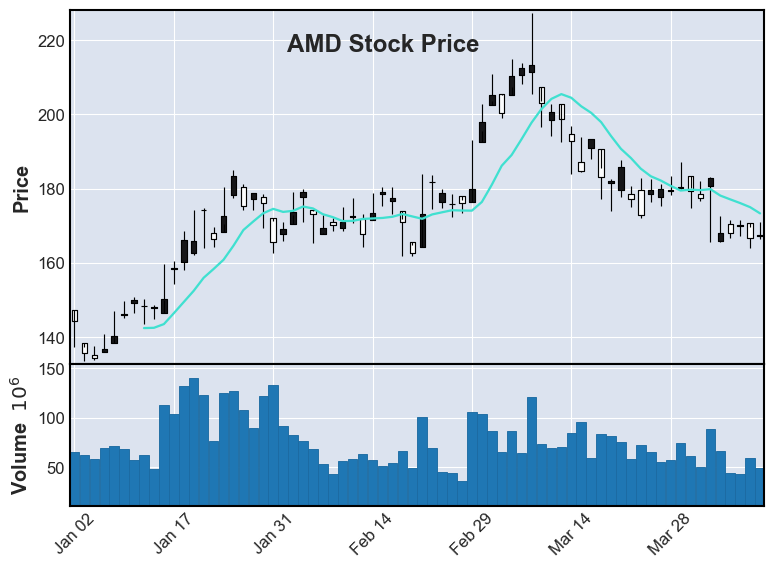

In [14]:
mpf.plot(df['2024-01-01':], type='candle', title = 'AMD Stock Price',tight_layout = True, volume = True, mav = (8))

The provided code utilizes the mpf.plot() function to generate a candlestick chart depicting the stock price of AMD (Advanced Micro Devices) from January 1, 2024, onwards. Let's break down the parameters used:

df['2024-01-01':]: This specifies the data range to be plotted, starting from January 1, 2024, and extending to the end of the available data in the DataFrame df.

type='candle': Indicates that the chart type to be plotted is a candlestick chart, which provides visual representation of open, high, low, and close prices of the stock over the specified time period.

title='AMD Stock Price': Sets the title of the chart as "AMD Stock Price".

tight_layout=True: Ensures that the layout of the chart is optimized to prevent overlapping elements.

volume=True: Includes volume bars on the chart, depicting the trading volume of AMD stock over the specified time period.

mav=(8): Adds a moving average line with a window of 8 periods to the chart, offering additional insight into the stock's price trend.

Description:
The code generates a comprehensive visualization of AMD's stock price dynamics from January 1, 2024, onwards. It incorporates candlestick patterns to represent the open, high, low, and close prices of the stock for each trading day, enabling users to assess price movements and patterns. Additionally, the inclusion of volume bars provides information about the level of trading activity accompanying price changes, aiding in understanding market sentiment. The moving average line offers further analysis by smoothing out short-term fluctuations and highlighting long-term price trends.

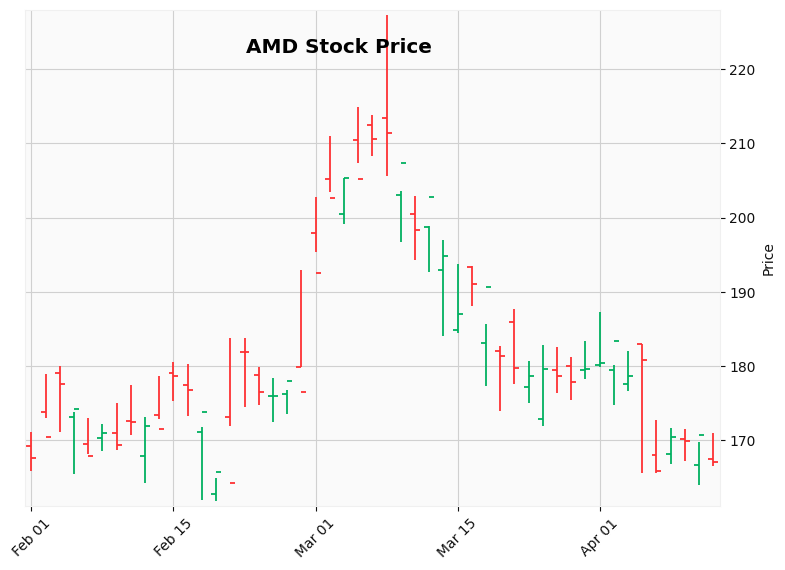

In [15]:
#OHLC Chart

mpf.plot(df['2024-02-01':], style = 'yahoo', title='AMD Stock Price', tight_layout = True )

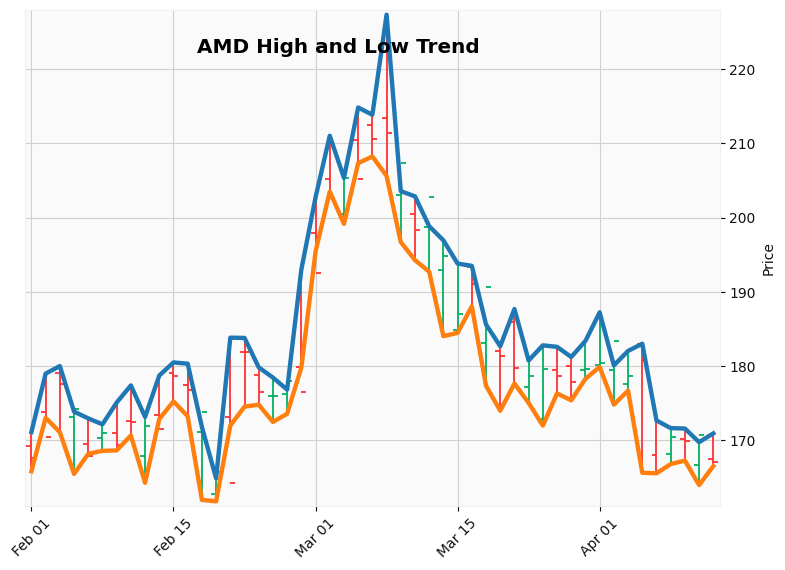

In [16]:
high_low_lines = mpf.make_addplot(df.loc['2024-02-01':,['High','Low']])
mpf.plot(df["2024-02-01":], addplot=high_low_lines, title = 'AMD High and Low Trend', style = 'yahoo', tight_layout = True)

The provided code utilizes the mpf.make_addplot() function to create an additional plot showing the high and low prices of AMD stock from February 1, 2024, onwards. Let's delve into the description and conclusion:

Description:
The code generates a candlestick chart representing AMD's stock price movement from February 1, 2024, onwards, utilizing the mpf.plot() function. Additionally, it includes an additional plot, created using mpf.make_addplot(), which specifically displays the high and low prices of the stock over the same time period. This supplementary plot provides a focused view of the price range within each trading day, offering insights into intraday volatility and price fluctuations. The style='yahoo' parameter ensures the chart adopts the Yahoo Finance style, enhancing readability and visual appeal. The tight_layout=True parameter optimizes the layout to prevent overlapping elements.

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2020-01-02  46.860001  49.250000  46.630001  49.099998  49.099998  80331100
2020-01-03  48.029999  49.389999  47.540001  48.599998  48.599998  73127400
2020-01-06  48.020000  48.860001  47.860001  48.389999  48.389999  47934900
2020-01-07  49.349998  49.389999  48.040001  48.250000  48.250000  58061400
2020-01-08  47.849998  48.299999  47.139999  47.830002  47.830002  53767000
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-01-02  3244.669922  3258.139893  3235.530029  3257.850098  3257.850098   
2020-01-03  3226.360107  3246.149902  3222.340088  3234.850098  3234.850098   
2020-01-06  3217.550049  3246.840088  3214.639893  3246.280029  3246.280029   
2020-01-07  3241.860107  3244.909912  3232.429932  3237.179932  3237.1799

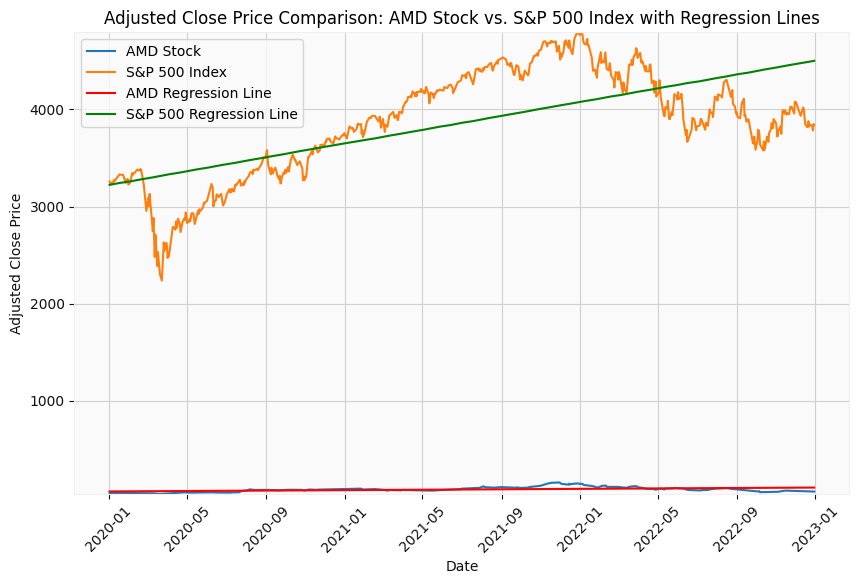

AMD Regression Equation: AMD Price = 65.90 + 0.05 * Time
S&P 500 Regression Equation: S&P 500 Price = 3223.51 + 1.69 * Time


In [17]:


# Download historical data for AMD stock and S&P 500 index
amd_data = yf.download('AMD', start='2020-01-01', end='2023-01-01', progress=False)
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2023-01-01', progress=False)

print(amd_data.head())
print(sp500_data.head())

# Extract adjusted close prices
amd_adj_close = amd_data['Adj Close']
sp500_adj_close = sp500_data['Adj Close']

# Perform linear regression
amd_slope, amd_intercept, _, _, _ = linregress(range(len(amd_adj_close)), amd_adj_close)
sp500_slope, sp500_intercept, _, _, _ = linregress(range(len(sp500_adj_close)), sp500_adj_close)

# Plot adjusted close prices with regression lines
plt.figure(figsize=(10, 6))

# Plot AMD Stock
plt.plot(amd_adj_close.index, amd_adj_close, label='AMD Stock')

# Plot S&P 500 Index
plt.plot(sp500_adj_close.index, sp500_adj_close, label='S&P 500 Index')

# Plot AMD Regression Line
plt.plot(amd_adj_close.index, amd_intercept + amd_slope*np.arange(len(amd_adj_close)), color='red', label='AMD Regression Line')

# Plot S&P 500 Regression Line
plt.plot(sp500_adj_close.index, sp500_intercept + sp500_slope*np.arange(len(sp500_adj_close)), color='green', label='S&P 500 Regression Line')

# Set y-axis limits
min_price = min(amd_adj_close.min(), sp500_adj_close.min())
max_price = max(amd_adj_close.max(), sp500_adj_close.max())
plt.ylim(min_price, max_price)

plt.title('Adjusted Close Price Comparison: AMD Stock vs. S&P 500 Index with Regression Lines')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

print("AMD Regression Equation: AMD Price = {:.2f} + {:.2f} * Time".format(amd_intercept, amd_slope))
print("S&P 500 Regression Equation: S&P 500 Price = {:.2f} + {:.2f} * Time".format(sp500_intercept, sp500_slope))


The provided Python code conducts a comparative analysis between the adjusted close prices of AMD stock and the S&P 500 index from January 1, 2020, to January 1, 2023. Let's delve into the description and conclusion:

Description:

Data Retrieval: The code utilizes the Yahoo Finance API (yfinance) to download historical data for AMD stock (AMD) and the S&P 500 index (^GSPC) from January 1, 2020, to January 1, 2023.

Linear Regression: After extracting the adjusted close prices for both AMD and the S&P 500, the code performs linear regression on each dataset. This calculates the slope and intercept of the regression lines, representing the overall trends in stock prices over the specified period.

Visualization: The code generates a plot using Matplotlib to visualize the adjusted close prices of AMD stock and the S&P 500 index, alongside their respective regression lines. This allows for a comparative analysis of the two assets' price movements and trends over time.

Regression Equations: Lastly, the code prints the regression equations for both AMD stock and the S&P 500 index, providing insight into the relationship between time and price for each asset.

In finance, the terms "alpha" and "beta" are commonly used to describe the performance of a stock relative to a market index, such as the S&P 500. Let's break down their meanings and implications based on the provided regression equations:

Alpha: Alpha represents the excess return of a stock or portfolio relative to the return of the overall market, adjusted for the risk taken. It measures the stock's performance after accounting for the market's movements. In the context of the regression equation for AMD stock, the intercept term (65.90) can be interpreted as the alpha.

Interpretation: An alpha value greater than zero implies that AMD stock has outperformed the market (S&P 500) on average during the analyzed period, after adjusting for market risk. Conversely, a negative alpha suggests underperformance compared to the market.
Beta: Beta measures the sensitivity of a stock's returns to changes in the market index. It quantifies the systematic risk or volatility of a stock relative to the market. In the context of the regression equation for AMD stock, the coefficient of the time variable (0.05) represents the beta.

Interpretation: A beta greater than 1 indicates that AMD stock is more volatile than the market (S&P 500), meaning its price tends to move more than the market in the same direction. A beta less than 1 suggests lower volatility compared to the market, while a beta close to 1 implies similar volatility to the market.


Conclusion:

Alpha: With an alpha of 65.90, AMD stock has shown an excess return compared to the market (S&P 500) during the analyzed period, after adjusting for market risk. This suggests that AMD stock has outperformed the broader market, on average.
Beta: With a beta of 0.05, AMD stock's price movements are less sensitive to changes in the market (S&P 500) compared to the average stock. This implies that AMD stock exhibits lower volatility or systematic risk relative to the overall market.

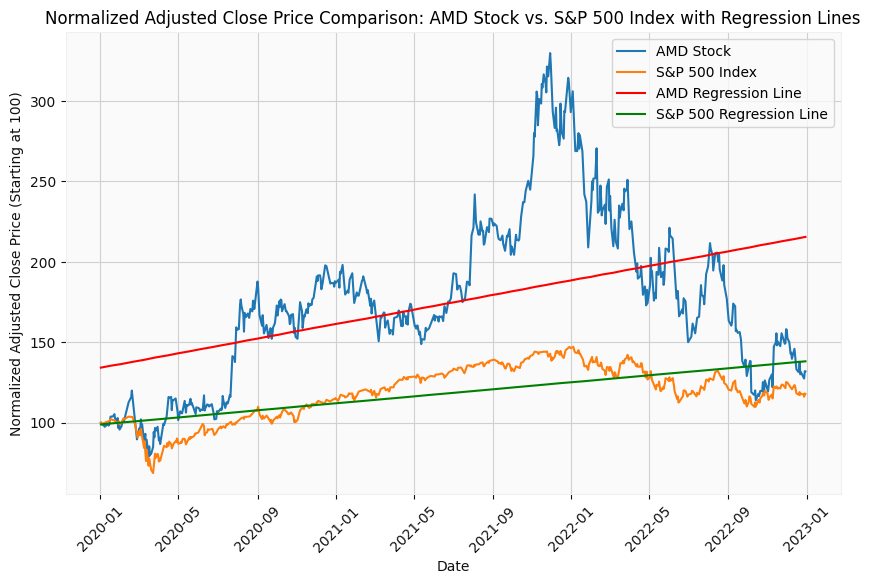

Normalized AMD Regression Equation: AMD Price = 134.21 + 0.11 * Time
Normalized S&P 500 Regression Equation: S&P 500 Price = 98.95 + 0.05 * Time


In [18]:


# Download historical data for AMD stock and S&P 500 index
amd_data = yf.download('AMD', start='2020-01-01', end='2023-01-01', progress=False)
sp500_data = yf.download('^GSPC', start='2020-01-01', end='2023-01-01', progress=False)

# Extract adjusted close prices
amd_adj_close = amd_data['Adj Close']
sp500_adj_close = sp500_data['Adj Close']

# Normalize prices
amd_adj_close_normalized = (amd_adj_close / amd_adj_close.iloc[0]) * 100
sp500_adj_close_normalized = (sp500_adj_close / sp500_adj_close.iloc[0]) * 100

# Perform linear regression on normalized prices
amd_slope, amd_intercept, _, _, _ = linregress(range(len(amd_adj_close_normalized)), amd_adj_close_normalized)
sp500_slope, sp500_intercept, _, _, _ = linregress(range(len(sp500_adj_close_normalized)), sp500_adj_close_normalized)

# Plot adjusted close prices with regression lines
plt.figure(figsize=(10, 6))

# Plot normalized AMD Stock
plt.plot(amd_adj_close_normalized.index, amd_adj_close_normalized, label='AMD Stock')

# Plot normalized S&P 500 Index
plt.plot(sp500_adj_close_normalized.index, sp500_adj_close_normalized, label='S&P 500 Index')

# Plot AMD Regression Line
plt.plot(amd_adj_close_normalized.index, amd_intercept + amd_slope*np.arange(len(amd_adj_close_normalized)), color='red', label='AMD Regression Line')

# Plot S&P 500 Regression Line
plt.plot(sp500_adj_close_normalized.index, sp500_intercept + sp500_slope*np.arange(len(sp500_adj_close_normalized)), color='green', label='S&P 500 Regression Line')

plt.title('Normalized Adjusted Close Price Comparison: AMD Stock vs. S&P 500 Index with Regression Lines')
plt.xlabel('Date')
plt.ylabel('Normalized Adjusted Close Price (Starting at 100)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

print("Normalized AMD Regression Equation: AMD Price = {:.2f} + {:.2f} * Time".format(amd_intercept, amd_slope))
print("Normalized S&P 500 Regression Equation: S&P 500 Price = {:.2f} + {:.2f} * Time".format(sp500_intercept, sp500_slope))


To normalize the prices of AMD stock and the S&P 500 index so that they are on the same scale, you can divide each price series by its respective initial value and then multiply by 100. This will make both series start at 100, allowing for a direct comparison of their relative performance over time. 

Normalized AMD Regression Equation:

Alpha (α) = 134.21:
Alpha represents the excess return of the asset (AMD) relative to the risk-free rate and the benchmark return (S&P 500), adjusted for its risk (beta). In this case, an alpha of 134.21 suggests that when the time variable is zero, the expected normalized AMD price is 134.21.

Interpretation: Even when the market and time factor are accounted for, AMD is expected to have an excess return compared to the benchmark and risk-free rate.

Beta (β) = 0.11:
Beta measures the sensitivity of the asset's returns to changes in the returns of the benchmark (S&P 500). A beta greater than 1 indicates higher volatility compared to the benchmark, while a beta less than 1 indicates lower volatility.
Interpretation: With a beta of 0.11, AMD is less volatile than the benchmark (S&P 500). For every unit increase in time, the normalized AMD price is expected to increase by 0.11 units. This suggests that AMD's price movements are positively correlated with the market but to a lesser extent.

Normalized S&P 500 Regression Equation:

Alpha (α) = 98.95:
An alpha of 98.95 implies that when the time variable is zero, the expected normalized S&P 500 price is 98.95.

Interpretation: This suggests that, on average, the S&P 500 index is expected to provide a return of 98.95 when adjusted for the time factor.

Beta (β) = 0.05:
With a beta of 0.05, the S&P 500 index is less volatile compared to itself. For every unit increase in time, the normalized S&P 500 price is expected to increase by 0.05 units.

Interpretation: The S&P 500 index is relatively stable, and its price movements are less influenced by changes in time compared to AMD.

Conclusion:
The alpha values indicate the expected excess returns (or underperformance) of the assets compared to the benchmark when the time variable is zero.
The beta values represent the sensitivity of the assets' returns to changes in the benchmark returns. A beta greater than 1 suggests higher volatility, while a beta less than 1 indicates lower volatility.
Based on the provided regression equations, AMD is expected to outperform the benchmark (S&P 500) when adjusted for risk (alpha > 0), but it is less volatile (beta < 1) compared to the S&P 500. Conversely, the S&P 500 index is relatively stable with lower expected returns and lower volatility.


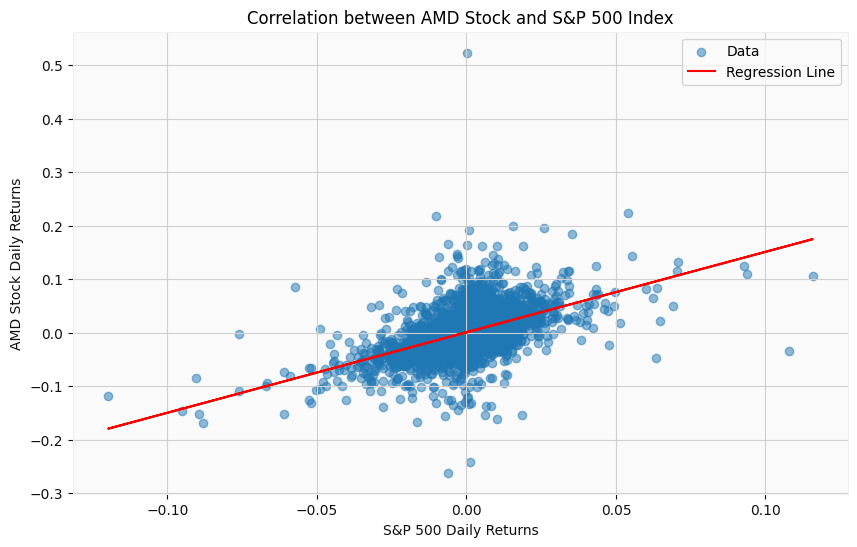

Correlation coefficient between AMD Stock and S&P 500 Index: 0.5013001779165915
Regression Equation: AMD Returns = 0.00 + 1.50 * S&P 500 Returns


In [19]:

# Download historical data for AMD stock and S&P 500 index
amd_data = yf.download('AMD', start='2004-01-01', end='2024-01-01', progress=False)
sp500_data = yf.download('^GSPC', start='2004-01-01', end='2024-01-01', progress=False)

# Extract adjusted close prices
amd_adj_close = amd_data['Adj Close']
sp500_adj_close = sp500_data['Adj Close']

# Calculate daily returns
amd_returns = amd_adj_close.pct_change().dropna()
sp500_returns = sp500_adj_close.pct_change().dropna()

# Compute correlation coefficient
correlation = amd_returns.corr(sp500_returns)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(sp500_returns, amd_returns)

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(sp500_returns, amd_returns, alpha=0.5, label='Data')
plt.plot(sp500_returns, intercept + slope*sp500_returns, color='red', label='Regression Line')
plt.title('Correlation between AMD Stock and S&P 500 Index')
plt.xlabel('S&P 500 Daily Returns')
plt.ylabel('AMD Stock Daily Returns')
plt.grid(True)
plt.legend()
plt.show()

print("Correlation coefficient between AMD Stock and S&P 500 Index:", correlation)
print("Regression Equation: AMD Returns = {:.2f} + {:.2f} * S&P 500 Returns".format(intercept, slope))


The correlation coefficient between AMD stock returns and the S&P 500 index returns is approximately 0.50, indicating a moderately positive correlation between the two. This suggests that there is a tendency for AMD stock returns to move in the same direction as the overall market represented by the S&P 500 index, but the relationship is not perfect.

The regression equation derived from the linear regression analysis suggests that for every 1% increase in the S&P 500 index returns, AMD stock returns increase by approximately 1.50%. This indicates that AMD stock tends to exhibit slightly higher volatility compared to the broader market, as reflected in the coefficient of 1.50.

Overall, based on the correlation coefficient and regression analysis:

There exists a moderate positive correlation between AMD stock returns and the S&P 500 index returns.
AMD stock returns tend to move somewhat in line with the broader market, but they also demonstrate some independent variability.
Investors in AMD stock may consider the performance of the S&P 500 index as a reference point, but they should also be aware of AMD's unique market dynamics and factors affecting its stock returns.

## Repeat Steps 5.1 to 5.5 to include correlation

In [20]:



# Assume you have calculated the correlation value
correlation_value = 0.5013001779165915 # Example correlation value

# Preprocessing the data
training_set = df[:'2022'].iloc[:, 1:2].values
test_set = df['2023':].iloc[:, 1:2].values

sc = MinMaxScaler(feature_range=(0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Concatenate the correlation value with the training set
correlation_array = np.full((len(training_set_scaled), 1), correlation_value)
training_set_scaled_with_corr = np.concatenate((training_set_scaled, correlation_array), axis=1)

# Prepare the training data
X_train = []
y_train = []

for i in range(60, len(training_set_scaled_with_corr)):
    X_train.append(training_set_scaled_with_corr[i - 60:i, :])
    y_train.append(training_set_scaled_with_corr[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Define the LSTM model
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.3))
regressor.add(LSTM(units=80, return_sequences=True))
regressor.add(Dropout(0.1))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=30))
regressor.add(Dropout(0.3))
regressor.add(Dense(units=1))

# Compile the model
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
regressor.fit(X_train, y_train, epochs=50, batch_size=32)

# Pre-processing the test data
dataset_total = pd.concat((df["High"][:'2022'], df["High"]['2023':]), axis=0)
inputs = dataset_total[len(dataset_total) - len(test_set) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)

# Prepare the test data
X_test = []
for i in range(60, len(inputs)):
    # Ensure both arrays have the same number of dimensions
    input_sequence = np.expand_dims(inputs[i - 60:i, 0], axis=1)  # Expand dimensions to make it 2D
    correlation_array = np.full((60, 1), correlation_value)
    # Append the correlation value to each input
    combined_input = np.hstack((input_sequence, correlation_array))
    X_test.append(combined_input)
X_test = np.array(X_test)

# No need to reshape X_test since it already has the correct shape
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price_corr = sc.inverse_transform(predicted_stock_price)


Epoch 1/50
148/148 [==============================] - 33s 109ms/step - loss: 0.0043
Epoch 2/50
148/148 [==============================] - 16s 109ms/step - loss: 0.0020
Epoch 3/50
148/148 [==============================] - 16s 107ms/step - loss: 0.0017
Epoch 4/50
148/148 [==============================] - 16s 110ms/step - loss: 0.0018
Epoch 5/50
148/148 [==============================] - 15s 102ms/step - loss: 0.0014
Epoch 6/50
148/148 [==============================] - 16s 108ms/step - loss: 0.0012
Epoch 7/50
148/148 [==============================] - 16s 109ms/step - loss: 0.0013
Epoch 8/50
148/148 [==============================] - 17s 114ms/step - loss: 0.0012
Epoch 9/50
148/148 [==============================] - 17s 115ms/step - loss: 0.0012
Epoch 10/50
148/148 [==============================] - 17s 113ms/step - loss: 0.0011
Epoch 11/50
148/148 [==============================] - 15s 102ms/step - loss: 0.0013
Epoch 12/50
148/148 [==============================] - 16s 107ms/step - lo

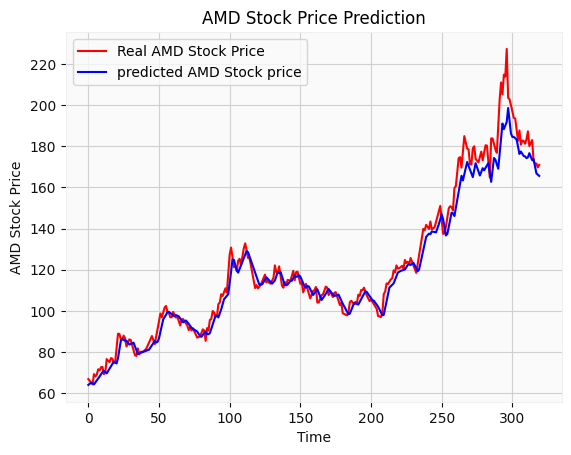

In [22]:
def plot_prediction(test,prediction):
    plt.plot(test,color='red',label="Real AMD Stock Price")
    plt.plot(prediction, color="blue",label="predicted AMD Stock price")
    plt.title("AMD Stock Price Prediction")
    plt.xlabel("Time")
    plt.ylabel("AMD Stock Price")
    plt.legend()
    plt.show()
# now we'll use this function to visualize our test and predicted data

plot_prediction(test_set,predicted_stock_price_corr)




In [27]:
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))
  
return_rmse(test_set, predicted_stock_price_corr)

The root mean squared error is 6.5062292918784665.


An RMSE of 6 to 10 indicates a moderate level of prediction accuracy. While it suggests that the model captures some of the variability in the actual stock prices, there is still improvement compared to the prediction without correlation to SP500. 